--- 
<strong> 
    <h1 align='center'>03 Exploring relationships
</h1> 
</strong>

---

Clone the repository -- __Exploratory Data Analysis in Python__

In [1]:
!git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 388, done.
remote: Counting objects: 100% (388/388), done.
remote: Compressing objects: 100% (334/334), done.
remote: Total 1759 (delta 109), reused 326 (delta 49), pack-reused 1371
Receiving objects: 100% (1759/1759), 180.86 MiB | 18.67 MiB/s, done.
Resolving deltas: 100% (601/601), done.
Checking out files: 100% (789/789), done.


__Change the current working directory__

In [2]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/20_Exploratory Data Analysis in Python/_dataset') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd) 

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/20_Exploratory Data Analysis in Python/_dataset


In [3]:
ls

'Behavioral Risk Factor Surveillance System(brfss).hdf5'
'General Social Survey(gss).hdf5'
'National Survey of Family Growth(nsfg).hdf5'


## __Dataset__

The __Behavioral Risk Factor Surveillance System (BRFSS)__ is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.


[“Behavioral Risk Factor Surveillance System”](https://www.cdc.gov/brfss/index.html)

<p align='center'>
    <a href=''#><img src='https://ci4.googleusercontent.com/proxy/_j2AqWBYT5lbECgd6kw9EygjzxbtkW5uAtPnX7538BRCp-Sr90xYwKIXkNWzkng-xwHfsFYr8mj-oj9jE_8WRLnTgi7ytaJM_CydlfCzDfwTNNGVDJGJtua6GuNl6p417C1XkdifhILQaA2r57TwDruTYhmtgf2GbNy4C-OiyOKstzbchZo=s0-d-e1-ft'>
    </a>
</p>


`pip install empiricaldist`

Python library that represents
[empirical distributions](https://nbviewer.jupyter.org/github/AllenDowney/empiricaldist/blob/master/empiricaldist/dist_demo.ipynb)




In [4]:
!pip install empiricaldist

  Created wheel for empiricaldist: filename=empiricaldist-0.6.0-cp36-none-any.whl size=10357 sha256=3f2e249f17643ffcc8fa2e97f3e7b439c45acef6ad423735a599d8fc28d0edf5
  Stored in directory: /root/.cache/pip/wheels/a7/18/38/f4791357371b1d677a885149b397cb1437c0ea88939ab642e7
Successfully built empiricaldist


In [5]:
# importing  the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf

In [6]:
brfss = pd.read_hdf('Behavioral Risk Factor Surveillance System(brfss).hdf5', 'brfss')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


# __Exploring relationships__

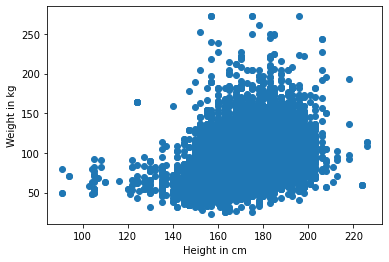

In [7]:
height = brfss['HTM4']  # Height in cm 
weight = brfss['WTKG3'] # Weight in kilograms

plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

In general, it looks like __taller people are heavier__, but there are a few things about this scatter plot that make it hard to interpret. 

Most importantly, it is "__overplotted__", which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. 

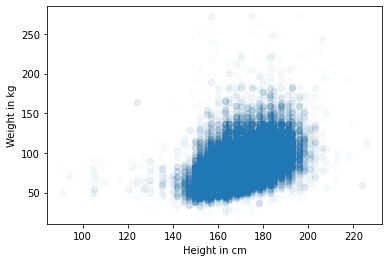

In [8]:
# Setting alpha parameter
'''
The lower the value of alpha, the more transparent
each data point is.
''' 
plt.plot(height, weight, 'o', alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

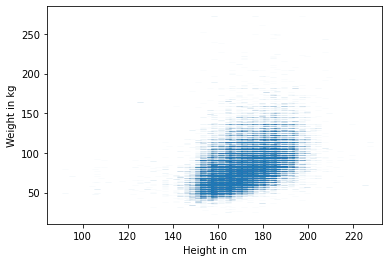

In [9]:
# setting the marker size
'''
With marker=1 and a low value of alpha, the scatter
plot is less saturated.
'''
plt.plot(height, weight, 'o', marker=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Now we can see that the points fall in discrete columns. That's because most heights were reported in inches and converted to centimeters. 

We can break up the columns by adding some random noise to the values; in effect, we are filling in the values that got rounded off.

Adding __random noise__ like this is called __"jittering"__. In this example, we have added noise with
-  __mean = 0__ 
-  __standard deviation = 2__.


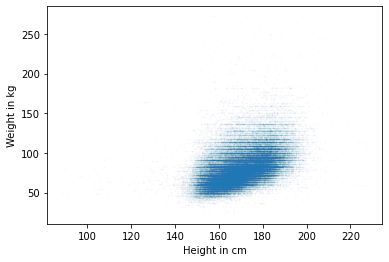

In [10]:
# Jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))

# ploting
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

The columns are gone, but now we can see that there are rows where people rounded off their weight. We can fix that by __jittering weight__, too

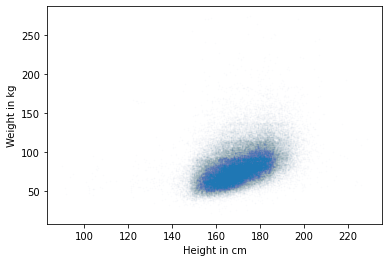

In [11]:
# More jittering
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

# ploting
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.01)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

We plot heights from __140 to 200__ centimeters and weights up to __160 kilograms__.

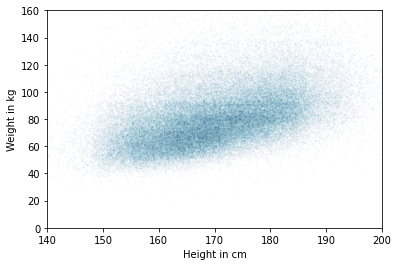

In [12]:
# Zoom
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

Finally, we have a reliable picture of the relationship between height and weight.

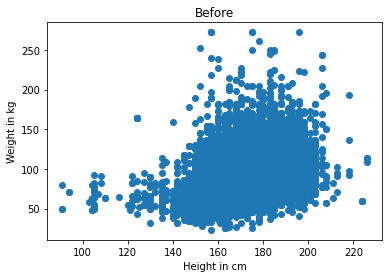

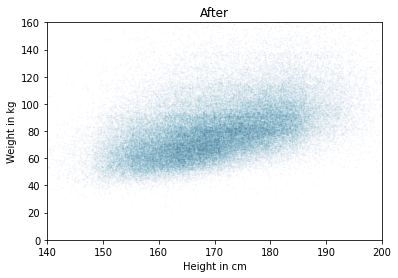

In [13]:
# Before Plot
plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('Before')
plt.show()

# After Plot
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('After')
plt.show()

## __01 PMF of age__

Do people tend to gain weight as they get older? We can answer this question by visualizing the relationship between weight and age. But before we make a scatter plot, it is a good idea to visualize distributions one variable at a time. Here, you'll visualize age using a bar chart first. Recall that all PMF objects have a `.bar()` method to make a bar chart.

The BRFSS dataset includes a variable, `'AGE'` (note the capitalization!), which represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. `'AGE'` contains the midpoint of the bins.




__Instructions:__

- Extract the variable 'AGE' from the DataFrame brfss and assign it to age.

- Plot the PMF of age as a bar chart.

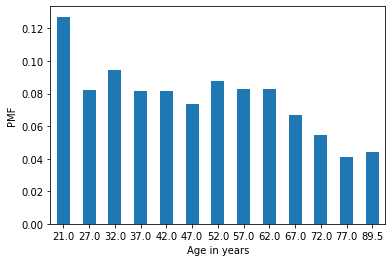

In [14]:
# Extract age
age = brfss['AGE']

# Plot the PMF
Pmf.from_seq(age).bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

## __02 Scatter plot__

Now let's make a scatterplot of weight versus age. To make the code run faster, I've selected only the first 1000 rows from the brfss DataFrame.

weight and age have already been extracted for you. Your job is to use plt.plot() to make a scatter plot.

__Instructions:__

- Make a scatter plot of weight and age with format string 'o' and alpha=0.1.

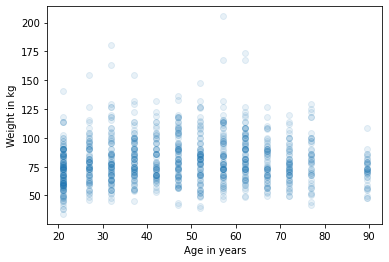

In [15]:
# Select the first 1000 respondents
brfss = brfss[:1000]
 
# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']
 
# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.1)
 
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
 
plt.show()

## __03 Jittering__

**Jittering** is the act of adding **random noise** to data in order to **prevent overplotting** in statistical graphs.

**Overplotting** can occur when a continuous measurement is rounded to some convenient unit.

This has the effect of changing a continuous variable into a discrete ordinal variable

The ages fall in columns because they've been rounded into 5-year bins.

If we jitter them, the scatter plot will show the relationship more clearly.

__Instruction:__

- Add random noise to age with mean `0` and standard deviation `2.5`.

- Make a scatter plot between weight and `age` with marker size `5` and `alpha=0.2`. Be sure to also specify `'o'`.

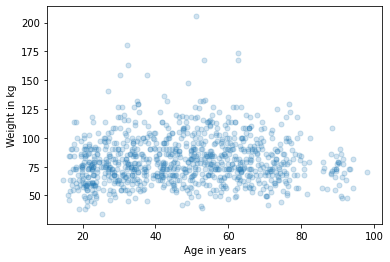

In [16]:
# weight and Age
# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5,size=len(brfss))
# Extract weight
weight = brfss['WTKG3'] 
 
# Make a scatter plot
plt.plot(age, weight, 'o', alpha=0.2, markersize=5)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

By smoothing out the __ages__ and avoiding saturation, we get the best view of the data.

But in this case the nature of the relationship is still hard to see. It looks like older people might be heavier, but it is hard to see clearly.

# __Visualizing relationships__

__Few changes in the code:__

- __First:__ we have reduced the __markersize__, because we have more data now

- __Second:__ we __jittered__ the weights, so the horizontal rows are not visible.

we jitter the ages, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns.


That makes it possible to see the shape of the distribution in each age group, and the differences between groups.

we can use KDE to estimate the density function in each column and plot it.



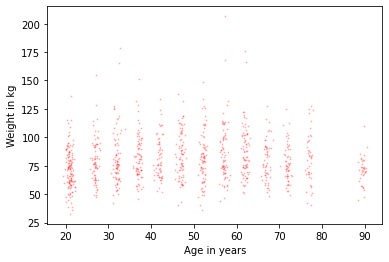

In [17]:
# Jittered 
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

plt.plot(age, weight, 'o', markersize=1, alpha=0.2, color='red')
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

__Violin plot__

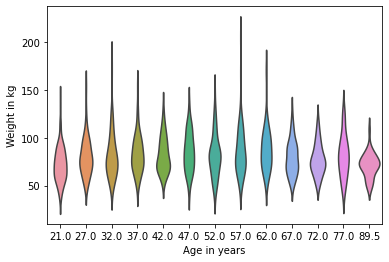

In [18]:
# Violin plot
data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

The parameter `inner=None` simplifies the plot a little.

Each column is a graphical representation of the distribution of weight in one age group. The **width of these shapes is proportional to the estimated density**, so it's like two vertical PDFs plotted back to back, and filled in with nice colors



__Box Plot__

>__This plot gives us the best view of the relationship between weight and age.__

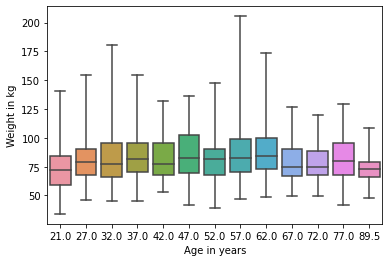

In [19]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

- Each box represents the **interquartile range**, or IQR, from the 25th to the 75th percentile.
- The line in the middle of each box is the **median**.
- The **spines** sticking out of the top and bottom show the **minimum** and **maximum** values.

- Looking at the medians, it seems like people in their *`40s` are the heaviest*; **younger** and **older** people are **lighter**.

- Looking at the **sizes of the boxes**, it seems like people in their `40s` have the **most variability in weight**, too.




__Log scale__

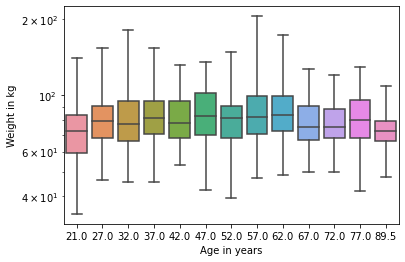

In [20]:
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

__Skewness:__ It is the **degree of distortion from the symmetrical bell curve** or the **normal distribution**. 

- It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail.

For data that skews toward higher values, it is sometimes useful to look at it on a logarithmic scale.

We can do that with the pyplot function yscale(). Here's what it looks like.

## __04 Height and weight__

Previously we looked at a scatter plot of height and weight, and saw that taller people tend to be heavier. Now let's take a closer look using a box plot. The `brfss` DataFrame contains a variable `'_HTMG10'` that represents height in centimeters, binned into 10 cm groups.

Recall how Allen created the box plot of `'AGE'` and `'WTKG3'` in the video, with the y-axis on a logarithmic scale:

```python
sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
```

__Instructions:__

- Fill in the parameters of `.boxplot()` to plot the __distribution of weight (`'WTKG3'`) in each height (`'_HTMG10'`) group__. Specify `whis=10`, just as was done in the video.

- Add a line to plot the y-axis on a logarithmic scale.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


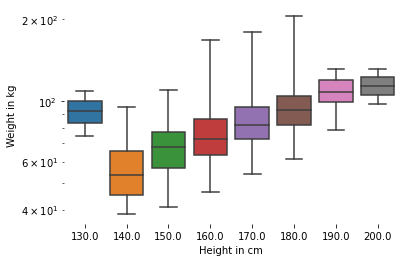

In [21]:
# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot('_HTMG10', 'WTKG3', data=data, whis=10)

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

## __05 Distribution of income__

In the next two exercises we'll look at relationships between income and other variables. In the BRFSS, income is represented as a categorical variable; that is, respondents are assigned to one of 8 income categories. The variable name is `'INCOME2'`. Before we connect income with anything else, let's look at the distribution by computing the PMF. Recall that all `Pmf` objects have a `.bar()` method.

__Instructions:
__

- Extract `'INCOME2'` from the brfss DataFrame and assign it to income.

- Plot the PMF of `income` as a bar chart.

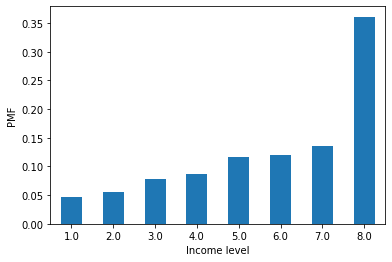

In [22]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf.from_seq(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

Almost half of the respondents are in the top income category.

So this dataset doesn't distinguish between the highest incomes and the median.

But maybe it can tell us something about people with incomes below the median.

## __06 Income and height__

Let's now use a violin plot to visualize the relationship between income and height.

__Instructions__

Create a violin plot to plot the distribution of height `('HTM4')` in each income `('INCOME2')` group. Specify `inner=None` to simplify the plot.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


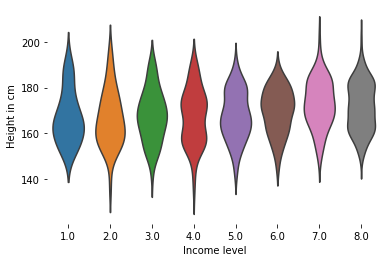

In [23]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot('INCOME2', 'HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

From the above plot, It looks like there is a weak positive relationsip between income and height, at least for incomes below the median.

# __Correlation__

__Correlation__ is a statistical measure that expresses the extent to which **two variables are linearly related** (meaning they change together at a constant rate).

__Types of Correlation:__

- _Positive, Negative or Zero Correlation_
- _Linear or Curvilinear Correlation_
- _Scatter Diagram Method_
- _Pearson's Product Moment Co-efficient of Correlation_
- _Spearman's Rank Correlation Coefficient_


When people say __"correlation"__ casually, they might mean any relationship between two variables. In statistics, it usually means __Pearson's correlation coefficient__, which is a number between __-1__ and __1__ that quantifies the strength of a linear relationship between variables.



__Correlation matrix__

- Correlation between **Height with itself**: 1
- Correlation between **Height and weight**: 0.47
-Correlation between **Height and age**: -0.09
- Correlation between **Weight and age**: 0.02



[[ 1.        -0.0011619]
 [-0.0011619  1.       ]]


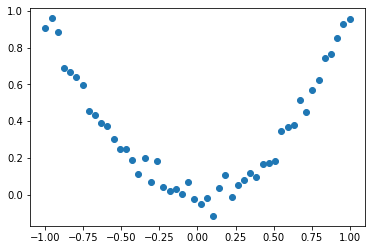

In [24]:
xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05,len(xs))
print(np.corrcoef(xs, ys))

plt.plot(xs, ys, 'o')
plt.show()

To demonstrate, I'll generate some fake data: xs contains equally-spaced points between -1 and 1. `ys` is `xs` squared plus some random noise.

Here's the scatter plot of `xs` and ys. It's clear that this is a strong relationship; if you are given `x`, you can make a much better guess about `y`. But here's the correlation matrix; the computed correlation is close to 0.

__Nonlinear relationships__

- But correlation only works for **linear relationships**. If the relationship is **nonlinear, correlation** generally underestimates how strong it is.

- In general, if correlation is high -- that is, close to 1 or -1, you can conclude that there is a strong linear relationship. 

- But if correlation is close to 0, that doesn't mean there is no relationship; there might be a strong, non-linear relationship.

$\color{red}{\textbf{NOTE:}}$ - __This is one of the reasons Why correlation is not such a great statistic.__

There's another reason to be careful with correlation; it doesn't mean what people take it to mean.

$\color{red}{\textbf{NOTE:}}$ - __Specifically, correlation says nothing about slope__. 

If we say that two variables are correlated, that means we can use one to predict the other. But that might not be what we care about.

## __Computing correlations__

The purpose of the BRFSS is to explore health risk factors, so it includes questions about diet. The variable `'_VEGESU1'` represents the number of servings of vegetables respondents reported eating per day.

Let's see how this variable relates to age and income.

Instructions

- From the brfss DataFrame, select the columns `'AGE'`, `'INCOME2'`, and `'_VEGESU1'`.

- Compute the correlation matrix for these variables.

               AGE   INCOME2  _VEGESU1
AGE       1.000000 -0.014141 -0.021548
INCOME2  -0.014141  1.000000  0.115264
_VEGESU1 -0.021548  0.115264  1.000000


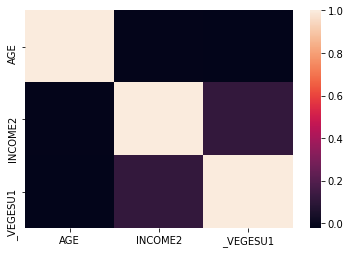

In [25]:
# Select columns
columns = ['AGE', 'INCOME2', '_VEGESU1']
subset = brfss[columns]
# Compute the correlation matrix
print(subset.corr())

# sns correlation plot
sns.heatmap(subset.corr())

### __Interpreting correlations__

- The correlation between __income__ and __vegetable consumption__ is about `0.12`. 

- The correlation between __age__ and __vegetable consumption__ is about `-0.01`.

__Interpretayion:__

- People with higher incomes eat more vegetables.

-  There could be a strong nonlinear relationship between __age__ and __vegetable consumption__.

The correlation between income and vegetable consumption is small, but it suggests that there is a relationship.

But a correlation close to 0 does mean there is no relationship.

## __Simple regression__

- Correlation does not always measure what we really want to know. 
- __Alternative__ - _simple linear regression_

LinregressResult(slope=0.012711665664613122, intercept=0.3473596610050707, rvalue=0.02272259592788688, pvalue=0.8755370267961167, stderr=0.08072568741146532)


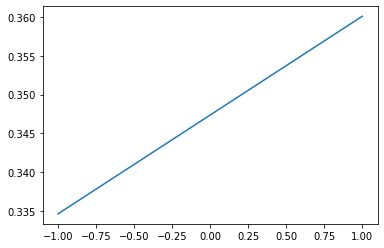

In [26]:
from scipy.stats import linregress

xs = np.linspace(-1, 1)
ys = xs**2
ys += np.random.normal(0, 0.05,len(xs))

res = linregress(xs, ys)
print(res)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-')

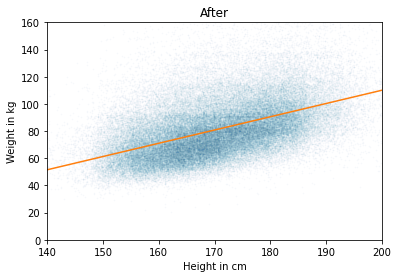

In [27]:
from scipy.stats import linregress

subset = brfss.dropna(subset=['WTKG3', 'HTM4'])

# Regression line
xs = subset['HTM4']
ys = subset['WTKG3']

res = linregress(xs, ys)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx  # Y=C+MX

plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140, 200, 0, 160])
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.title('After')
plt.plot(fx, fy, '-')
plt.show()

__Linear relationships__

However, linear regression has the same problem as correlation; it only measures the strength of a linear relationship. 



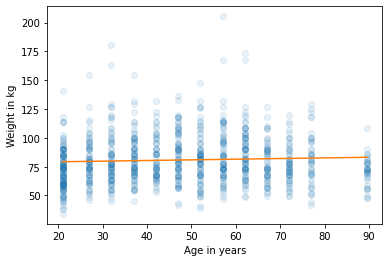

In [28]:
# Select the first 1000 respondents
brfss = brfss[:1000]
 
# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']
plt.clf()
plt.plot(age, weight, 'o', alpha=0.1)

# Subset for linregress
subset = brfss.dropna(subset=['WTKG3', 'AGE'])
xs = subset['AGE']
ys = subset['WTKG3']
res = linregress(xs, ys)

# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx  # Y=C+MX
plt.plot(fx, fy, '-')

# Make a scatter plot
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

And here's what the line of best fit looks like.

$\color{red}{\textbf{NOTE:}}$ - __A straight line does not capture the relationship between these variables well__.

## __07 Income and vegetables__

As we saw in a previous exercise, the variable `'_VEGESU1'` represents the number of vegetable servings respondents reported eating per day.

Let's estimate the slope of the relationship between vegetable consumption and income.

__Instructions__

- Extract the columns `'INCOME2'` and `'_VEGESU1'` from subset into `xs` and `ys` respectively.

- Compute the simple linear regression of these variables.

In [29]:
from scipy.stats import linregress
 
# Extract the variables
subset = brfss.dropna(subset=['INCOME2', '_VEGESU1'])
xs = subset['INCOME2']
ys = subset['_VEGESU1']
 
# Compute the linear regression
res = linregress(xs,ys)
print(res)

LinregressResult(slope=0.07000027412424817, intercept=1.5413758521321232, rvalue=0.11526352353306703, pvalue=0.0015115444024927935, stderr=0.021983967667553426)


## __09 Fit a line__

Continuing from the previous exercise:

- Assume that `xs` and `ys` contain income codes and daily vegetable consumption, respectively, and

- `res` contains the results of a simple linear regression of `ys` onto `xs`.

Now, you're going to compute the line of best fit. NumPy has been imported for you as `np`.

Instructions

- Set `fx` to the minimum and maximum of xs, stored in a NumPy array.

- Set `fy` to the points on the fitted line that correspond to the `fx`.

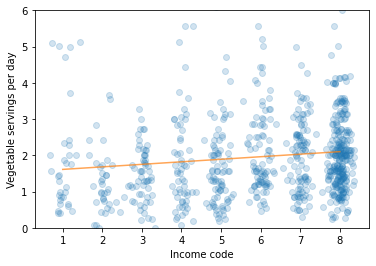

In [30]:
# Plot the scatter plot
plt.clf()
x_jitter = xs + np.random.normal(0, 0.15, len(xs))
plt.plot(x_jitter, ys, 'o', alpha=0.2)
 
# Plot the line of best fit
fx = np.array([xs.min(), xs.max()])
fy = res.slope * fx + res.intercept
plt.plot(fx, fy, '-', alpha=0.7)
 
plt.xlabel('Income code')
plt.ylabel('Vegetable servings per day')
plt.ylim([0, 6])
plt.show()

<p align='center'>
    <a href="https://twitter.com/F4izy">
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px
            height=50px>
    </a>
    <a href="https://www.linkedin.com/in/mohd-faizy/">
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px>
    </a>
</p>